In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 설명
 4개의 베어링이 축에 설치되었다. 회전 속도는 마찰 벨트를 통해 축에 결합된 AC 모터에 의해 2000rpm으로 일정하게 유지되었습니다. <br>
 6000lbs의 방사형 하중이 스프링 메커니즘에 의해 샤프트와 베어링에 인가됩니다. 모든 베어링은 강제 윤활됩니다.<br>
그림 1과 같이 축에 렉스노드 ZA-2115 이중 열 베어링이 장착되었습니다. PCB 353B33 고감도 쿼츠 ICP 가속도계가 베어링 하우징에 장착되었습니다(가속계 2개).<br>
데이터 세트 1의 각 베어링에 대해 [x 및 y-devel], 데이터 세트 2와 3)의 각 베어링에 대해 하나의 가속도계입니다.<br>
센서 위치는 그림 1에도 나와 있습니다. 모든 고장은 1억 회전이 넘는 베어링의 설계 수명을 초과한 후에 발생했습니다.<br>
<br>
<br>
# 데이터 구조
데이터 집합은 검정-고장 실험을 설명합니다. <br>
데이터 세트는 특정 간격으로 기록된 1초 진동 신호 스냅샷인 개별 파일로 구성됩니다. <br>
각 관측치 샘플링 속도가 20kHz로 설정된 20,480개의 포인트로 구성됩니다.<br>
 파일 이름은 데이터가 수집된 시기를 나타냅니다. 데이터 파일의 각 레코드(행)는 데이터 지점입니다. NIDAQ Card 6062E에 의해 데이터 수집이 촉진되었습니다. <br>
 타임스탬프의 간격이 길면(파일 이름에 표시됨) 다음 근무일에 실험이 재개됨을 나타냅니다.

In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm # 반복문 진행 바 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime # 날짜 타입 사용을 위한 라이브러리

sns.set_style("white") # seaborn 그래프 형태 사전설정
sns.set_context("talk") # seaborn 그래프 형태 사전설정

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Anomaly Detection 수진 윤표/Nasa_Bearing.csv', parse_dates= ['Unnamed: 0'])

In [ ]:
data.rename({'Unnamed: 0':'date_time'}, axis = 1, inplace = True)

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  6324 non-null   datetime64[ns]
 1   Bearing 1  6324 non-null   float64       
 2   Bearing 2  6324 non-null   float64       
 3   Bearing 3  6324 non-null   float64       
 4   Bearing 4  6324 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 247.2 KB


In [ ]:
# 데이터를 기간별로 확인하기 위해 데이터프레임 슬라이싱
# iloc: 데이터프레임 슬라이싱 [시작행 : 끝행, 시작열 : 끝열]

data_0304_to0319 =  data.iloc[:2179,:]
data_0320_to0405 =  data.iloc[2179:4621,:]
data_0406_to0418 = data.iloc[4621:,:]

## 전체 기간 시각화

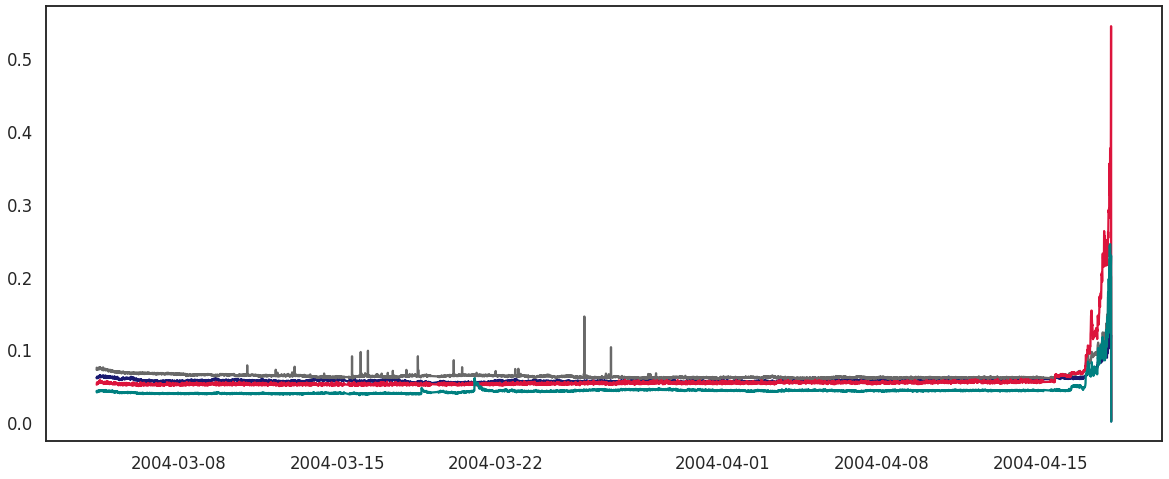

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data['date_time'], data['Bearing 1'], c = Bearing1_color)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data['date_time'], data['Bearing 2'], c = Bearing2_color)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data['date_time'], data['Bearing 3'], c = Bearing3_color)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data['date_time'], data['Bearing 4'], c = Bearing4_color)

## 기간별 시각화 & 차트 꾸미기

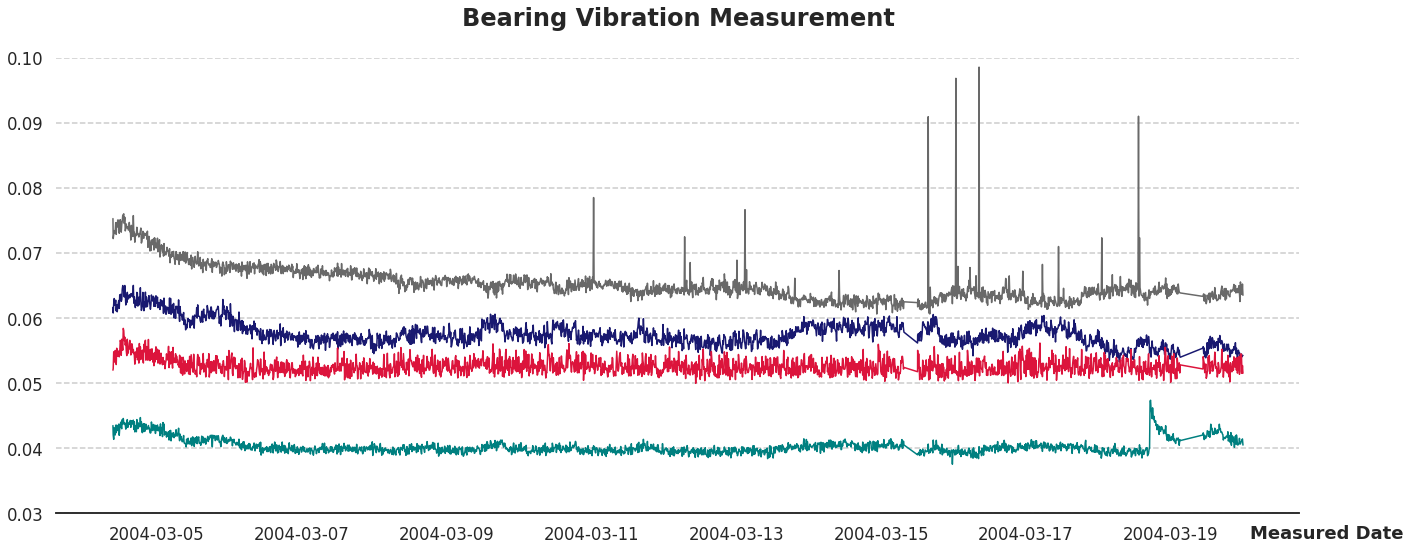

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.1)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.96, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()

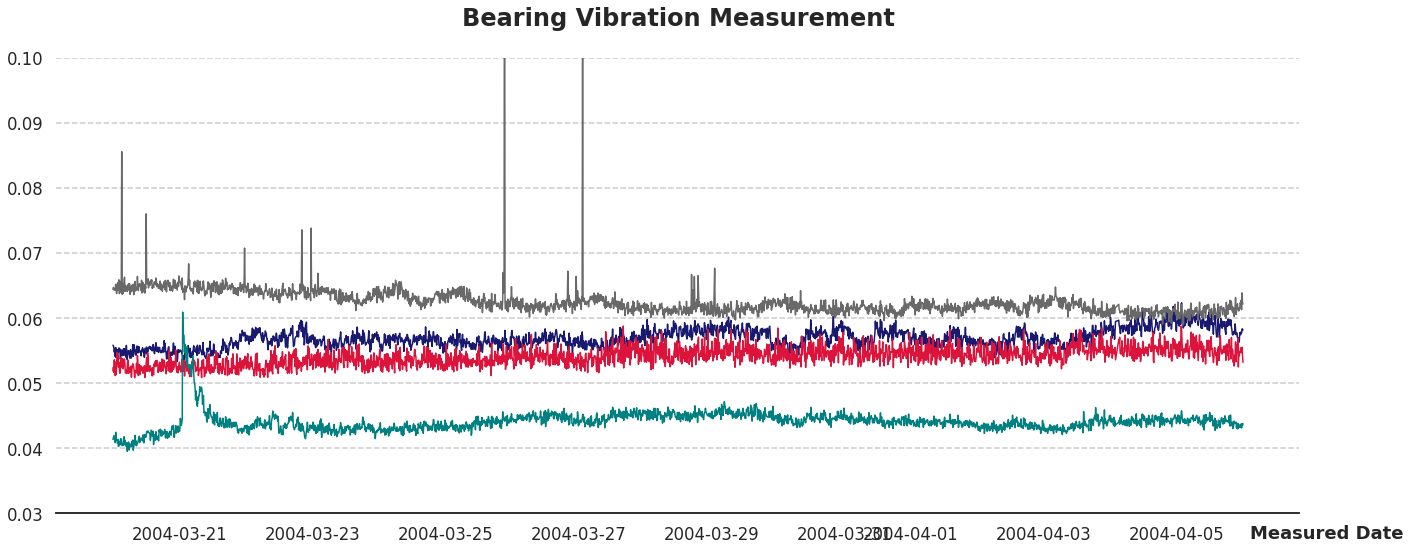

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.1)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.96, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()

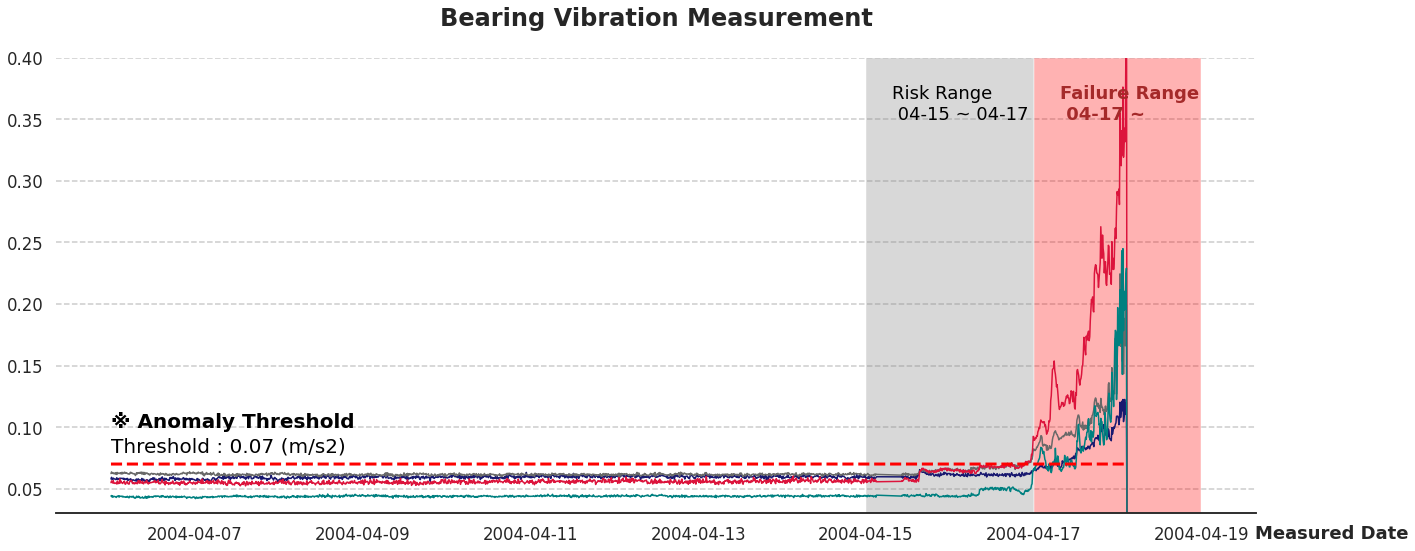

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.4)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.999, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# 위험범위 박스 추가
risk_start = datetime(2004, 4, 15)
risk_end = datetime(2004, 4, 17)
ax.axvspan(xmin = risk_start, xmax = risk_end, fc="gray", alpha=0.3)
ax.text(datetime(2004, 4, 15, 7, 30), 0.35, "Risk Range \n 04-15 ~ 04-17",  color="k")

# 장비 결함 박스 추가
failure_start = datetime(2004, 4, 17)
failure_end = datetime(2004, 4, 19)
ax.axvspan(xmin = failure_start, xmax = failure_end, fc="r", alpha=0.3)
ax.text(datetime(2004, 4, 17, 7, 30), 0.35, "Failure Range \n 04-17 ~",  color="brown", fontweight = 'bold')

# 가상의 임계값 라인 추가
ax.plot(data_0406_to0418['date_time'], [0.07 for i in range(1703)], c = 'r', linewidth = 3, linestyle = '--')

# 임계값 설명 추가
font_category = {"fontsize":20, "ha":"left", "color":"k"}
ax.text(datetime(2004, 4, 6), 0.1, "※ Anomaly Threshold", fontdict=font_category, fontweight="bold") 
ax.text(datetime(2004, 4, 6), 0.08, 'Threshold : 0.07 (m/s2)', fontdict=font_category)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()

# 전처리 및 변수 추출

### 1. Log 변환
### 2. FFT
### 3. FE

### 주파수 스펙트럼 분석
- 푸리에 변환 이전 어떤 주파수를 사용해야 하는지 확인
- 스펙트럼 그래프에서 높은 값을 가지는 성분의 주파수를 선택
- https://crazyj.tistory.com/160
<br>
<br>
data_0304_to0319 <br>
data_0320_to0405 <br>
data_0406_to0418 <br>

In [ ]:
data.iloc[:5917,:]

,date_time,Bearing 1,Bearing 2,Bearing 3,Bearing 4,month,day,hour
0,2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475,3,4,9
1,2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039,3,4,9
2,2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360,3,4,9
3,2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126,3,4,9
4,2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617,3,4,10
...,...,...,...,...,...,...,...,...
5912,2004-04-14 23:11:57,0.059220,0.060920,0.057360,0.043859,4,14,23
5913,2004-04-14 23:21:57,0.059557,0.060610,0.054541,0.044381,4,14,23
5914,2004-04-14 23:31:57,0.059387,0.061862,0.056988,0.044023,4,14,23
5915,2004-04-14 23:41:57,0.061110,0.061716,0.057055,0.044596,4,14,23


In [ ]:
train = data.iloc[3907:5917,:]
test = data.iloc[5917:,:]

In [ ]:
train_fft = np.fft.fft(train.loc[:,'Bearing 1' : 'Bearing 4'])
test_fft = np.fft.fft(test.loc[:,'Bearing 1' : 'Bearing 4'])

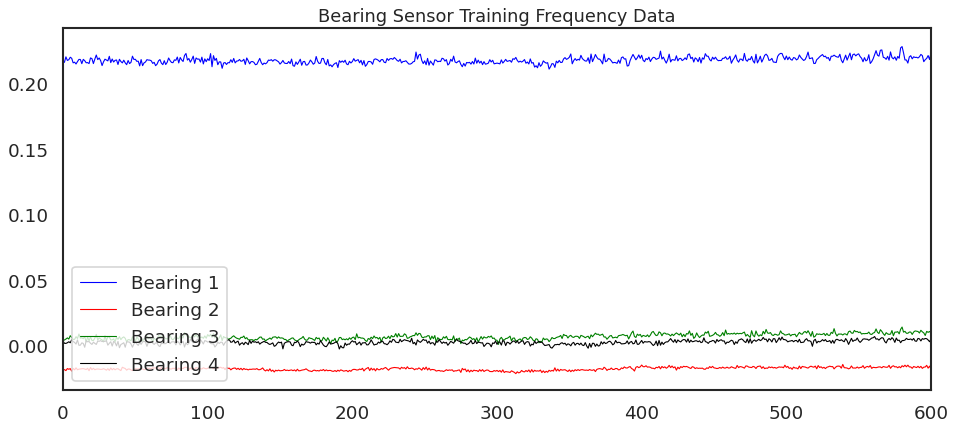

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
plt.xlim(0, 600)
ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
plt.show()

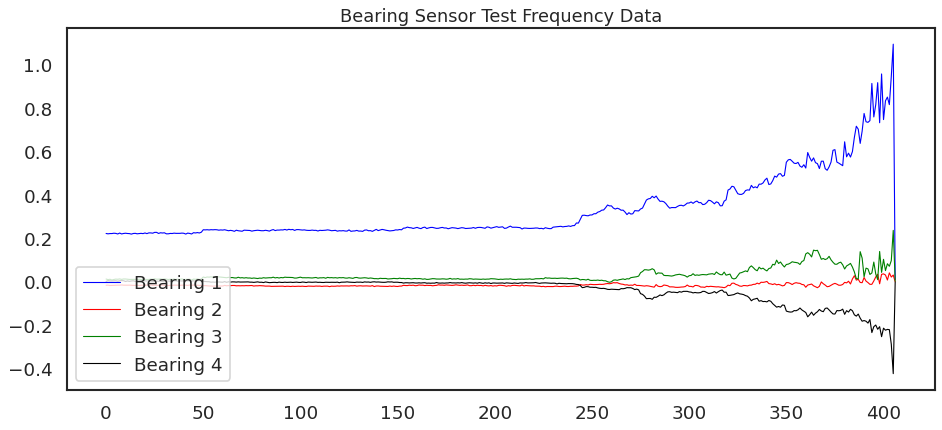

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Test Frequency Data', fontsize=16)
plt.show()